# ĐỒ ÁN THỰC HÀNH #1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/TungPham24/NYC_Airbnb_2019/main/AB_NYC_2019.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Quan sát và mô tả dữ liệu

###1. Kiểu dữ liệu của các thuộc tính

In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

###2. Price

####Giá phòng cao nhất, thấp nhất, giá trung bình, mức giá xuất hiện nhiều

In [ ]:
print("Giá phòng cao nhất: " + str(df['price'].max()))
print("Giá phòng thấp nhất: " + str(df['price'].min()))
print("Giá trung bình: " + str(df['price'].mean()))
print("Mức giá xuất hiện nhiều: " + str(df['price'].mode()))

Giá phòng cao nhất: 10000
Giá phòng thấp nhất: 0
Giá trung bình: 152.7206871868289
Mức giá xuất hiện nhiều: 0    100
Name: price, dtype: int64


####Độ lệch chuẩn của cột price

In [ ]:
print("Độ lệch chuẩn của cột price: " + str(df['price'].std()))

Độ lệch chuẩn của cột price: 240.15416974718758


####Giá phòng phân phối quanh trung tâm hay cách xa trung tâm:

Do độ lệch chuẩn khá lớn nên giá phòng sẽ phân phối cách xa trung tâm

####Nhận xét về mean và median của Price

In [ ]:
print("Mean: " + str(df['price'].mean()))
print("Median: " + str(df['price'].median()))

Mean: 152.7206871868289
Median: 106.0


Nhận xét: mean > median cho thấy phân phối của Price không phải là phân phối chuẩn (mean = median). Price đang bị lệch phải.

####Đồ thị histogram

(array([11., 20., 17., ...,  0.,  0.,  6.]),
 array([0.00000000e+00, 5.79710145e+00, 1.15942029e+01, ...,
        9.98840580e+03, 9.99420290e+03, 1.00000000e+04]),
 <BarContainer object of 1725 artists>)

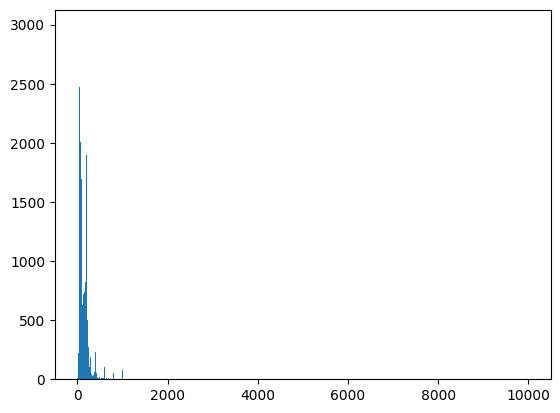

In [ ]:
plt.hist(df['price'], bins = "auto")

Nhận xét: dữ liệu bị lệch phải, phân bố chủ yếu trong đoạn từ 0 - 2000

###3. Số lượng missing value của mỗi thuộc tính

In [ ]:
df.isnull().sum().sort_values(ascending = False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Như vậy, có 4 thuộc tính có missing value:

  - last_review: 10052 giá trị

  - reviews_per_month: 10052 giá trị

  - host_name: 16 giá trị

  - host_id: 16 giá trị

###4. Tỉ lệ phần trăm missing value của mỗi thuộc tính

In [ ]:
for c in df.columns:
  percentage = df[c].isnull().mean()
  print(f'{c}: {round(percentage * 100, 2)}%')

id: 0.0%
name: 0.03%
host_id: 0.0%
host_name: 0.04%
neighbourhood_group: 0.0%
neighbourhood: 0.0%
latitude: 0.0%
longitude: 0.0%
room_type: 0.0%
price: 0.0%
minimum_nights: 0.0%
number_of_reviews: 0.0%
last_review: 20.56%
reviews_per_month: 20.56%
calculated_host_listings_count: 0.0%
availability_365: 0.0%


Dựa vào kết quả trên, ta thấy:

 - number_of_reviews và reviews_per_month có tỉ lệ missing value cao nhất (hơn 20 %)

 - name và host_name có tỉ lệ missing value thấp (dưới 1%)

###5. Xử lý missing value

Đối với 2 thuộc tính có tỉ lệ missing value thấp (dưới 1%), ta lựa chọn xóa các dòng bị missing value (do tỉ lệ missing value quá thấp nên các biện pháp xử lý missing value không ảnh hưởng quá nhiều đến kết quả phân tích của dataset)

In [ ]:
df_drop = df.dropna(subset = ["name", "host_name"])
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  last_review                     

Xử lý 2 thuộc tính có missing value chiếm tỉ lệ cao (hơn 20%) là last_review và reviews_per_month

Tách ra phần dataset mà reviews_per_month và last_review nhận giá trị null

In [ ]:
null_lastrev_df = df[df['last_review'].isna()]
null_lastrev_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10052 entries, 2 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10052 non-null  int64  
 1   name                            10042 non-null  object 
 2   host_id                         10052 non-null  int64  
 3   host_name                       10047 non-null  object 
 4   neighbourhood_group             10052 non-null  object 
 5   neighbourhood                   10052 non-null  object 
 6   latitude                        10052 non-null  float64
 7   longitude                       10052 non-null  float64
 8   room_type                       10052 non-null  object 
 9   price                           10052 non-null  int64  
 10  minimum_nights                  10052 non-null  int64  
 11  number_of_reviews               10052 non-null  int64  
 12  last_review                     

In [ ]:
null_reviews_per_month_df = df[df['reviews_per_month'].isna()]
null_reviews_per_month_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10052 entries, 2 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10052 non-null  int64  
 1   name                            10042 non-null  object 
 2   host_id                         10052 non-null  int64  
 3   host_name                       10047 non-null  object 
 4   neighbourhood_group             10052 non-null  object 
 5   neighbourhood                   10052 non-null  object 
 6   latitude                        10052 non-null  float64
 7   longitude                       10052 non-null  float64
 8   room_type                       10052 non-null  object 
 9   price                           10052 non-null  int64  
 10  minimum_nights                  10052 non-null  int64  
 11  number_of_reviews               10052 non-null  int64  
 12  last_review                     

Nhận xét: mọi dòng mà last_review bị null thì reviews_per_month cũng null và ngược lại.

In [ ]:
for c in null_reviews_per_month_df.columns:
  print(f'{c}:{len(null_reviews_per_month_df[c].unique())}')

id:10052
name:9885
host_id:8238
host_name:3817
neighbourhood_group:5
neighbourhood:193
latitude:7662
longitude:6652
room_type:3
price:514
minimum_nights:84
number_of_reviews:1
last_review:1
reviews_per_month:1
calculated_host_listings_count:44
availability_365:364


In [ ]:
null_reviews_per_month_df['number_of_reviews'].unique()

array([0])

In [ ]:
df_0_rev = df[df['number_of_reviews'] == 0]
df_0_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10052 entries, 2 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10052 non-null  int64  
 1   name                            10042 non-null  object 
 2   host_id                         10052 non-null  int64  
 3   host_name                       10047 non-null  object 
 4   neighbourhood_group             10052 non-null  object 
 5   neighbourhood                   10052 non-null  object 
 6   latitude                        10052 non-null  float64
 7   longitude                       10052 non-null  float64
 8   room_type                       10052 non-null  object 
 9   price                           10052 non-null  int64  
 10  minimum_nights                  10052 non-null  int64  
 11  number_of_reviews               10052 non-null  int64  
 12  last_review                     

Nhận xét: tất cả các dòng bị null ở reviews_per_month và last_review đều nhận giá trị number_of_reviews là 0 và ngược lại. Xét về mặt ngữ nghĩa thì việc 2 thuộc tính này nhận giá trị null là hoàn toàn đúng do căn phòng này không có lượt review nào (number_of_reviews = 0), dẫn đến nó không thể có ngày review cuối cùng (last_review) và số reviews trong 1 tháng (reviews_per_month)

Kết luận: không thể kết luận giá trị null ở reviews_per_month và last_review là missing value. Do đó, không có cần thiết phải xử lý missing value ở 2 thuộc tính này.

###6. Outlier:

<Axes: ylabel='price'>

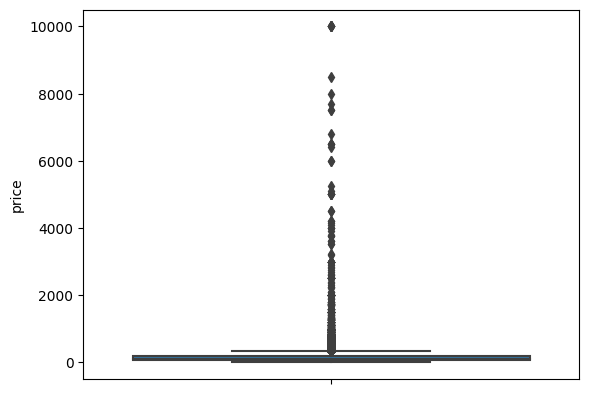

In [ ]:
sns.boxplot(y = "price", data = df)

Nhận xét: biểu đồ cho thấy sự tồn tại số lượng lớn outlier ở thuộc tính price.

##Visualize dữ liệu dạng bảng hoặc đồ thị

###1. Thống kê neighbourhood_group

In [ ]:
def print_unique(att):
  u = df[att].unique()
  print(f'Số lượng "{att}": {len(u)}')
  for i in u:
    print(i)
print_unique("neighbourhood_group")


Số lượng "neighbourhood_group": 5
Brooklyn
Manhattan
Queens
Staten Island
Bronx


In [ ]:
def statistics_att(att):
  a = df[att].unique()
  f_arr = []
  per_arr = []
  for i in a:
    temp = (df[att] == i).sum()
    f_arr.append(temp)
    per = temp * 100 / len(df)
    per_arr.append(f'{round(per,2)}%')

  col1 = pd.Series(a, name = att)
  col2 = pd.Series(f_arr, name = "Frequency")
  col3 = pd.Series(per_arr, name = "Percentage")
  tab = pd.concat([col1, col2, col3], axis = 1)
  return tab

table_neighgroup = statistics_att("neighbourhood_group")
table_neighgroup.head()

,neighbourhood_group,Frequency,Percentage
0,Brooklyn,20104,41.12%
1,Manhattan,21661,44.3%
2,Queens,5666,11.59%
3,Staten Island,373,0.76%
4,Bronx,1091,2.23%


###2. Thống kê room_type

In [ ]:
print_unique("room_type")

Số lượng "room_type": 3
Private room
Entire home/apt
Shared room


In [ ]:
table_roomtype = statistics_att("room_type")
table_roomtype.head()

,room_type,Frequency,Percentage
0,Private room,22326,45.66%
1,Entire home/apt,25409,51.97%
2,Shared room,1160,2.37%


####Vẽ bar chart:
Nhận xét: do đề bài yêu cầu vẽ bar chart, dataset cần visualize hiện tại là table_roomtype:

 - room_type: categorical
 - Frequency: quantitative
 - Percentage: quantitative

Không nên dùng bar chart để visualize thuộc tính Percentage (thay vì Pie chart)

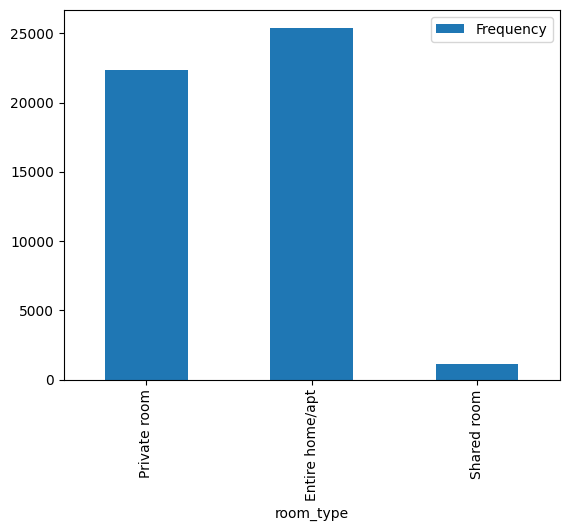

In [ ]:
table_roomtype.plot.bar(x="room_type", y = "Frequency")
plt.show()

Nhận xét: nhìn vào biểu đồ, ta thấy loại phòng Entire home/apt có tần suất lớn nhất trong dataset (gần 25000 dòng), ít nhất là Shared room

###3. Giá trung bình mỗi đêm:
Tính giá trung bình mỗi đêm của từng loại phòng và từng quận của New York (neighbourhood_group)

In [ ]:
def avg_price(dataframe, att):
  t = dataframe[att].unique()
  kq = []
  for i in t:
    df_temp = dataframe[dataframe[att] == i]
    avg = df_temp['price'].mean()
    kq.append(round(avg,2))

  col1 = pd.Series(data=kq, name="Price")
  col2 = pd.Series(data=t, name=att)
  tab = pd.concat([col2, col1], axis = 1)
  return tab

In [ ]:
price_roomtype = avg_price(df, "room_type")
price_roomtype.head()

,room_type,Price
0,Private room,89.78
1,Entire home/apt,211.79
2,Shared room,70.13


In [ ]:
price_neighgroup = avg_price(df, "neighbourhood_group")
price_neighgroup.head()

,neighbourhood_group,Price
0,Brooklyn,124.38
1,Manhattan,196.88
2,Queens,99.52
3,Staten Island,114.81
4,Bronx,87.50


###4. Sự khác biệt giữa lưu trú tại Entire room và Share room giữa các vùng lân cận

####Entire room

In [ ]:
def roomtype_avg_price(roomtype):
  df_room = df[df['room_type'] == roomtype]
  return avg_price(df_room, "neighbourhood_group")

In [ ]:
entireRoom_price = roomtype_avg_price("Entire home/apt")
entireRoom_price.head()

,neighbourhood_group,Price
0,Manhattan,249.24
1,Brooklyn,178.33
2,Queens,147.05
3,Bronx,127.51
4,Staten Island,173.85


####Shared room

In [ ]:
sharedRoom_price = roomtype_avg_price("Shared room")
sharedRoom_price.head()

,neighbourhood_group,Price
0,Manhattan,88.98
1,Queens,69.02
2,Brooklyn,50.53
3,Bronx,59.80
4,Staten Island,57.44


In [ ]:
entireRoom_price = entireRoom_price.rename(columns = {"Price": "Entire room price"})
sharedRoom_price = sharedRoom_price.rename(columns = {"Price": "Shared room price"})
tab = pd.merge(entireRoom_price, sharedRoom_price, on = "neighbourhood_group")

tab.head()

,neighbourhood_group,Entire room price,Shared room price
0,Manhattan,249.24,88.98
1,Brooklyn,178.33,50.53
2,Queens,147.05,69.02
3,Bronx,127.51,59.80
4,Staten Island,173.85,57.44


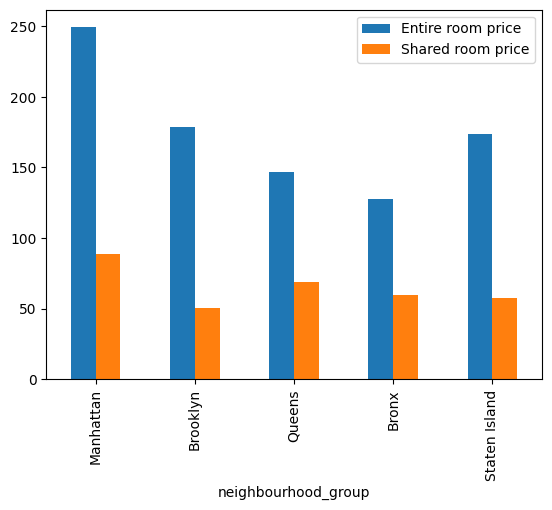

In [ ]:
tab.plot.bar(x='neighbourhood_group', y=['Entire room price', 'Shared room price'])
plt.show()

Nhận xét:

- Nhìn chung, giá cho thuê 1 đêm của loại phòng Entire room cao hơn hẳn so với Share room ở tất cả các khu vực
- Đối với loại Entire room thì giá cho thuê ở Bronx là thấp nhất, ở Manhattan là cao nhất
- Đối với loại Shared room thì giá cho thuê ở Brooklyn là thấp nhất, Manhattan là cao nhất
- Từ đó cho thấy Manhattan có chi phí thuê phòng cao nhất ở cả 2 loại phòng so với các quận còn lại.

###5. Giá trung bình cho Private Room

####Bảng thống kê dữ liệu

In [ ]:
privateRoom_price = roomtype_avg_price("Private room")
privateRoom_price.head()

,neighbourhood_group,Price
0,Brooklyn,76.50
1,Manhattan,116.78
2,Queens,71.76
3,Staten Island,62.29
4,Bronx,66.79


####Biểu đồ so sánh
Vì biểu đồ phục vụ cho mục tiêu so sánh nên ta chọn biểu đồ cột (bar chart)

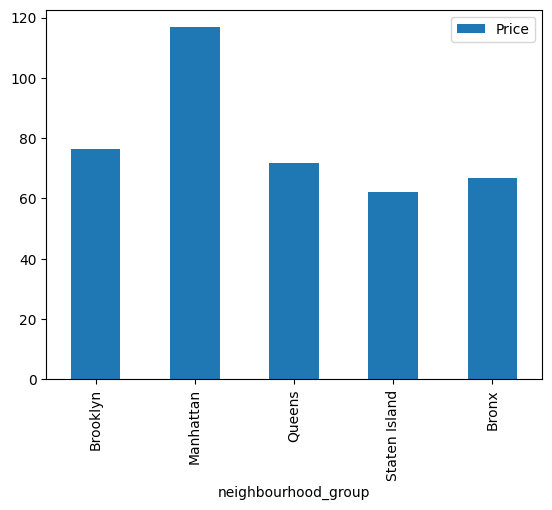

In [ ]:
privateRoom_price.plot.bar(x='neighbourhood_group', y='Price')
plt.show()

Nhận xét:

- Đối với loại phòng Private room, giá cho thuê 1 đêm ở Manhattan cao hơn hẳn so với 4 quận còn lại.
- Giá của các quận còn lại không có sự chênh lệch đáng kể.
- Giá cho thuê 1 đêm thấp nhất là ở Staten Island.

###6. Nơi lưu trú rẻ nhất:

In [ ]:
roomtypes_price = pd.merge(tab, privateRoom_price, on="neighbourhood_group")
roomtypes_price= roomtypes_price.rename(columns = {"Price": "Private room price"})
roomtypes_price.head()

,neighbourhood_group,Entire room price,Shared room price,Private room price
0,Manhattan,249.24,88.98,116.78
1,Brooklyn,178.33,50.53,76.50
2,Queens,147.05,69.02,71.76
3,Bronx,127.51,59.80,66.79
4,Staten Island,173.85,57.44,62.29


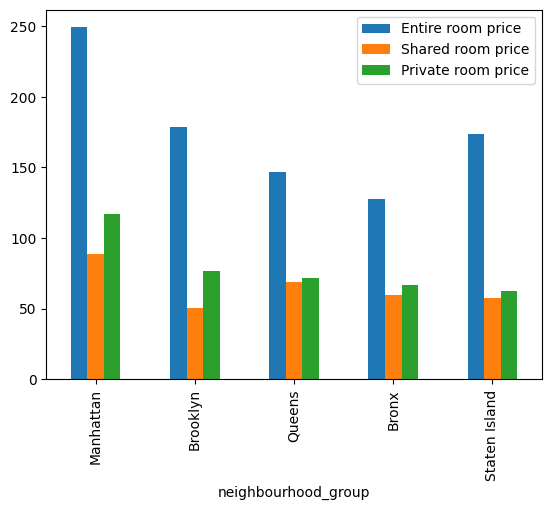

In [ ]:
roomtypes_price.plot.bar(x='neighbourhood_group', y=['Entire room price', 'Shared room price', 'Private room price'])
plt.show()

Nhận xét: Kết hợp dữ liệu ở bảng thống kê giá trung bình 1 đêm của tất cả loại phòng ở từng quận ở câu 3 và biểu đồ trên, ta thấy Bronx là quận có chi phí lưu trú trung bình rẻ nhất.
Đối với từng loại phòng:

- Entire room: Bronx
- Shared room: Brooklyn
- Private room: Staten Island

###7. Giá trung bình của từng loại phòng ở các vùng lân cận:
Theo biểu đồ câu 6 thì:
- Entire room: Manhattan > Brooklyn > Staten Island > Queens > Bronx
- Shared room: Manhattan > Queens > Bronx > Staten Island > Brooklyn
- Private room: Manhattan > Brooklyn > Queens > Bronx > Staten Island